We are going to investigate whether Fandango's movie rating system is still biased after a recent article that showed Fandongo had an unfair and biased rating system.

In [1]:
import pandas as pd

previous= pd.read_csv('fandango_score_comparison.csv')
after= pd.read_csv('movie_ratings_16_17.csv')
fandango_previous= previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after= after[['movie', 'year', 'fandango']].copy()



Hickey's sampling was not random because his selection criteria was that the movie must have had at least 30 fan ratings on Fandango at the time of sampling, and the moview must have had tickets on sale in 2015.

Instead of trying to determine whether there has been any change in Fandango's rating system following Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

In [2]:
sample= fandango_after.sample(10, random_state= 1)
sample

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


We can confirm that 90% of these movies are popular (they have 30 or more fan comments as of 2018), and we will verify that there are only popular movies in our fandango_previous dataset.

In [3]:
sum(fandango_previous['Fandango_votes']<30)

0

In [4]:
fandango_previous['Year']= fandango_previous['FILM'].str[-5:-1]
fandango_2015= fandango_previous[fandango_previous['Year']=='2015']
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [5]:
fandango_2016= fandango_after[fandango_after['year']==2016]
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


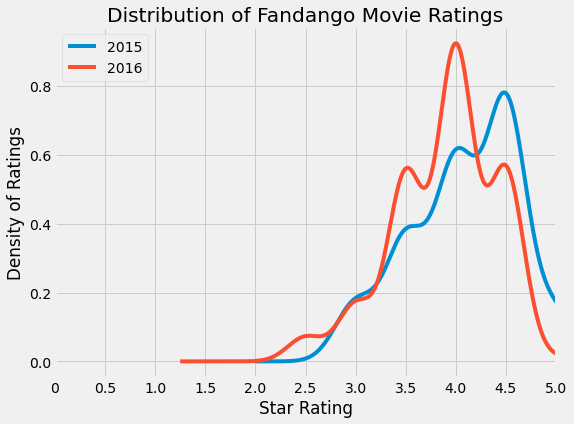

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
fandango_2015['Fandango_Stars'].plot.kde(label= '2015', legend= True)
fandango_2016['fandango'].plot.kde(label= '2016', legend= True)
plt.xlabel('Star Rating')
plt.ylabel('Density of Ratings')
plt.xticks(ticks= [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], labels= [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlim(0,5)
plt.title('Distribution of Fandango Movie Ratings')
plt.show()

The 2015 ratings have a much higher density of nearly perfect ratings, and the graph is skewed left, while the 2016 ratings are centered around 4, and have a nearly normal distribution. 

In [7]:
print('2015')
fandango_2015['Fandango_Stars'].value_counts(normalize= True).sort_index()

2015


3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [8]:
print('2016')
fandango_2016['fandango'].value_counts(normalize= True).sort_index()

2016


2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64

We can see that the ratings in 2016 are slightly lower than in 2015. We see that the modal class goes from 4.5 to 4.0, and there is a new 2.5 class added in 2016. 

In [12]:
mean_2015= fandango_2015['Fandango_Stars'].mean()
median_2015= fandango_2015['Fandango_Stars'].median()
mode_2015= fandango_2015['Fandango_Stars'].mode()[0]

mean_2016= fandango_2016['fandango'].mean()
median_2016= fandango_2016['fandango'].median()
mode_2016= fandango_2016['fandango'].mode()[0]

print("The mean, median, and mode of movie ratings in 2015 are {}, {}, {}.".format(round(mean_2015, 2), median_2015, mode_2015))
print("The mean, median, and mode of movie ratings in 2016 are {}, {}, {}.".format(round(mean_2016, 2), median_2016, mode_2016))

The mean, median, and mode of movie ratings in 2015 are 4.09, 4.0, 4.5.
The mean, median, and mode of movie ratings in 2016 are 3.89, 4.0, 4.0.


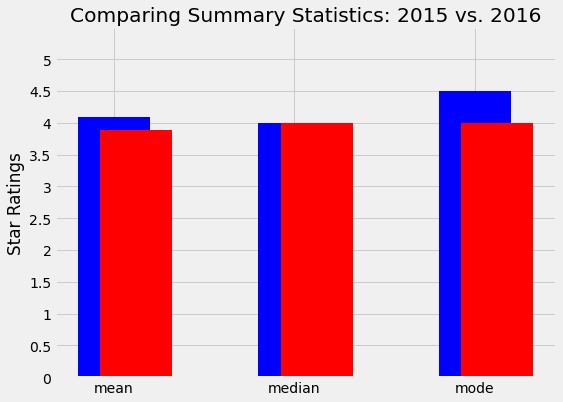

In [10]:
plt.figure(figsize= (8,6))

plt.bar(x=0, height=mean_2015, color= 'blue')
plt.bar(x=.25, height= mean_2016, color= 'red')

plt.bar(x= 2, height= median_2015, color= 'blue')
plt.bar(x= 2.25, height= median_2016, color= 'red')

plt.bar(x= 4, height= mode_2015, color= 'blue')
plt.bar(x= 4.25, height= mode_2016, color= 'red')

plt.ylabel('Star Ratings')
plt.xticks(ticks= [0, 2, 4], labels= ['mean', 'median', 'mode'])
plt.title('Comparing Summary Statistics: 2015 vs. 2016')
plt.ylim(0,5.5)
plt.yticks(ticks= [0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], labels= [0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()


In [11]:
summary= pd.DataFrame()
summary['2015']= [mean_2015, median_2015, mode_2015]
summary['2016']= [mean_2016, median_2016, mode_2016]
summary.index= ['mean', 'median', 'mode']
summary

print('This is the percent change in the mean from 2015 to 2016: ', 1-(summary['2016'][0]/summary['2015'][0]))

This is the percent change in the mean from 2015 to 2016:  0.04842683568951989


We can see that there is a significant change (5%) in the mean ratings from 2015 to 2016. 